In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# Cancelamentos de Reservas

https://www.kaggle.com/competitions/ih-hotel-booking

In [3]:
tb_hotel = pd.read_csv("data/tb_hotel_traintest.csv")


* **hotel** - (str) Tipo de hotel.
* **is_cancelled** - (binary) Variável binária indicando cancelamento da reserva (0 = não cancenlada, 1 = cancelada) - variável resposta do case.
* **lead_time** - (int) Número de dias entre data da reserva e data de entrada no hotel (quando a reserva foi feita).
* **arrival_date** - (date) Data de entrada no hotel (para quando a reserva é).
* **stays_in_weekend_nights** - (int) Número de dias em finais de semana na reserva.
* **stays_in_week_nights** - (int) Número de dias de semana na reserva.
* **adults** - (int) Número de adultos.
* **children** - (int) Número de crianças.
* **babies** - (int) Número de bebes.
* **meal** - (str) Tipo de refeição inclusa na reserva.
* **country** - (str) País do cliente.
* **market_segment** - (str) Segmentação de marketing do cliente.
* **distribution_channel** - (str) Canal de vendas pelo qual a reserva foi feita.
* **is_repeated_guest** - (binary) O cliente já ficou hospedado no hotel? (0 = não, 1 = sim).
* **previous_cancellations** - (int) Quantas reservas o cliente já cancelou no passado.
* **previous_bookings_not_canceled** - (int) Quantas reservas o cliente já fez e não cancelou no passado.
* **reserved_room_type** - (str) Tipo de quarto desejado.
* **assigned_room_type** - (str) Tipo de quarto reservado.
* **booking_changes** -  (str) Número de mudanças na reserva entre data de reserva e entrada/cancelamento.
* **deposit_type** - (str) Tipo de adiantamento feito no momento da reserva.
* **agent** - (str) ID do Agente que fez a reserva (NA caso a reserva não tenha sido feita por um agente).
* **company**  - (str) ID da empresa que fez a reserva (NA caso a reserva não seja corporativa)
* **days_in_waiting_list** - (int) Quantos dias demorou a confirmação da reserva.
* **customer_type** - (str) Tipo de reserva.
* **adr** - (float) Average Daily Rate, preço médio de cada diária na reserva.
* **required_car_parking_spaces** - (int) Número de vagas em estacionamento requisitadas na reserva.
* **total_of_special_requests** - (int) Número de requisições especiais na reserva (cama dupla, andar, quarto com vista...)
* **reservation_status_date** - (date) Data da última atualização feita na reserva.

In [32]:
tb_hotel.head()


,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,3
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01,4


In [33]:
profile = ProfileReport(
    tb_hotel[["lead_time", "adults"]], title="Pandas Profiling Report", explorative=True
)
profile.to_widgets()


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/multimethod/__init__.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Generate report structure: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


# Goal – Predictive Analytics

## Definition

In this stage we ask you to pick the booking dataset notebook you previously worked on and perform feature engineering and feature selection so that the dataset is ready for binary model classification training that furthermore be able to predict correctly if a booking instance will be cancelled or not.
Requirements:
- Feature engineering | Examples:
    - Combine features
    - Feature scaling transformations
    - Binarizations
- Feature selection
- Predictive model implementation
- Setup data splits (train/test)
- Experiment at least 2 models
    - What are their advantages?
    - What are their disadvantages?
- Evaluate models performance and implement other classification metrics
- Briefly explain their meaning
- Write notes explaining your decisions

## Deliverable

The main output of this stage is a prediction analytics notebook of a hotel bookings dataset with the aim of booking churn predictions. Notes must be included which explains your critical thinking and assumptions.

# Etapas de Construção de um Modelo

Antes de seguir em frente com a atividade vamos relembrar as etapas para construir um modelo!

## Leitura de dados

A primeira etapa na construção de qualquer modelo é a obtenção dos dados. Isso pode ser *tão simples quanto carregar um dataset* da SKLEARN ou *tão complexo quanto construir um webscrapper*. 

No exemplo de hoje estaremos trabalhando sobre uma tabela disponibilizada em CSV. O checklist abaixo pode guia-lo no processo de carregar e validar a entrada de dados:

- **Ler arquivo .csv para um DataFrame pandas**
- **Validar número de colunas**
- **Validar e tratar tipo das colunas** (principalmente datas através da função pd.to_datetime)
- **Ler mapa de dados** (caso seja disponibilizado) para entender o que cada coluna representa.

## EDA (Análise Exploratória de Dados)

A segunda etapa na construção de um modelo é a análise exploratória de dados. Neste momento buscamos *entender* o nosso conjunto de dados através de gráficos e tabelas que resumam a relação entre as diversas variáveis.

Vamos relembrar dos objetivos dessa etapa:

- **Avaliação de problemas nos dados** (missing value e informações incorretas)
    - **Ferramentas:** .info, .describe, .head, mapa de dados
- **Familiarização com o conteúdo de cada variável**
    - **Ferramentas:** boxplots e histogramas, tabelas de contagem, pandas-profiling
- **Mapeamento das relações entre meus features e minha variável resposta**
    - **Ferramentas:** scatterplots e pairplots, .groupby, .pivot_table, PCA 
- **Feature Engineering** para criar novas variáveis
    - **Ferramentas:** PCA, np.log, .qcut e .cut, np.where e .loc
    - *Feature engineering é um dos aspectos mais complexos e impactantes* na construção de um modelo. As transformações mais comuns são as transformações numéricas (como o log), a discretização de variáveis continuas (através de cut, qcut ou np.where), a aglomeração de categorias, a binarização de variáveis continuas e categóricas.
    
Nesta etapa devemos investir tempo em tentar **ENTENDER O PROBLEMA**:

- *Qual é o fenômeno que queremos modelar*?
- *Sem considerar os dados, o que, conceitualmente, impacta minha variável resposta?*
- *Considerando os dados, quais variáveis representam bem esses conceitos?*

No entanto, devemos estar atentos ao **tempo disponível** para resolvermos o problema! Qualquer modelo pode ser melhorado se investirmos mais tempo nele, logo o tempo disponível é uma pré-condição do erro que iremos obter. O **processo de modelagem é iterativo** e a construção de modelos simples e imprecisos é uma etapa importante na construção de modelos complexos.

Embora o principal resultado de uma análise exploratória seja o *aprofundamento do nosso conhecimento* sobre o problema, na prática também devemos obter um **FEATURE SET**, um conjunto de variáveis de entrada sobre o qual construíremos nossos modelos. Uma vez que tenhamos este feature set podemos dividi-lo em conjunto de treinamento e um de teste - sempre prestando atenção nos problemas de **leakage**:

- Caso o nosso feature set contenha transformações que sejam calculadas a partir dos dados (por exemplo normalização ou PCA) devemos construir estes transformadores utilizando apenas o conjunto train e então aplica-los ao conjunto teste.
- Muitas vezes algumas variáveis de uma tabela podem ser contaminadas: por exemplo, em um problema de previsão binária de chuva não podemos utilizar a variável mm/h de chuva. Uma forma simples de tratar isso é se perguntar: terei esta variável no momento da previsão?

## Modelo Baseline

Os modelos de baseline são modelos simples (do ponto de vista matemático) que fornecem um erro base que tentaremos melhorar através da utilização de algoritmos mais sofisticados. Como vimos, muitos algoritmos tem hiperparâmetros que são criticos na construção de um modelo. A utilização de modelos simples nos dá um valor de comparação para avaliarmos os primeiros hiperparâmetros que testarmos.

Dois modelos são comumemnte utilizados como baseline preditivo:

- **Regressão logística**
- **1-NN (kNN com n-neighbors = 1)**

A *regressão logística é um modelo linear*, sem nenhum hiperparâmetro, ou seja, o resultado da regressão em si é fruto apenas das variáveis de entrada escolhidas.

Além da simplicidade, **ela é uma ferramenta investigativa interessante** - possibilitando mapear os efeitos de variáveis específicas dentro de um feature set: como vimos a **colinearidade entre variáveis de entrada altera o impacto** que cada uma tem quando as consideramos conjuntamente. **A regressão nos permite desembaraçar estes efeitos!** Podemos utilizar simulações como vimos em aula para aumentar nossa compreensão do feature set escolhido.

A grande limitação da regressão logística é a linearidade: muitas vezes a estimativa de erro da regressão será bem pessimista. **Para ter uma idéia da performance esperada de algoritmos não-lineares podemos utilizar o modelo 1-NN**. 

## Modelo Final

Armados com uma estimativa de erro inicial, podemos prosseguir para a implantação de modelos utilizando algoritmos mais complexo, como árvores de decisão ou métodos de ensemble. Nessa etapa é crítico lembrar que estes algoritmos tem **hiperparâmetros que são determinantes em sua performance**. 

Podemos utilizar o **GridSearchCV** para encontrar os hiperparâmetros ótimos de um dado algoritmo, mas esse processo é custoso. Então vale a pena testar alguns valores bem separados para entender em que região cada hiperparâmetro parece funcionar melhor.

Ao final desta etapa teremos uma avaliação de erro sobre nosso conjunto teste e devemos fazer uma submissão à competição :)

**Agora, armados com todo o conhecimento que a construção dos modelos nos deu, podemos voltar à etapa de EDA para adicionar novos features, pensar em novos dados, enfim, recomeçar o processo, só que desta vez não do zero!**

# Solução Case Hotel

## Data Load/Transform

In [10]:
def transform_data(tb_hotel):
    tb_hotel["arrival_date"] = pd.to_datetime(tb_hotel["arrival_date"])
    tb_hotel["arrival_date_month"] = tb_hotel["arrival_date"].dt.month
    tb_hotel["arrival_date_year"] = tb_hotel["arrival_date"].dt.year
    tb_hotel["is_agent"] = np.where(tb_hotel["agent"].isna(), False, True)
    tb_hotel["is_company"] = np.where(tb_hotel["company"].isna(), False, True)
    tb_hotel["log_lead_time"] = np.log(tb_hotel["lead_time"] + 1)
    tb_hotel["reservation_type"] = np.where(
        (tb_hotel["lead_time"] + 1) < 10, "last_minute", "scheduled"
    )
    tb_hotel = tb_hotel.drop(["company", "agent"], axis=1)
    tb_hotel = tb_hotel.dropna()
    return tb_hotel


def create_country_agg(tb_hotel_trans):
    train_data = tb_hotel_trans.copy()
    train_data["n_rows_country"] = train_data.groupby(["country"])["country"].transform(
        "count"
    )
    train_data["grouped_country"] = np.where(
        train_data["n_rows_country"] < 5000, "other", train_data["country"]
    )
    tb_depara_country = (
        train_data.groupby(["country", "grouped_country"]).count().reset_index()
    )
    return tb_depara_country[["country", "grouped_country"]]


def create_season(tb_hotel_trans, depara_country):
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(depara_country, on="country")
    table = (
        train_data.groupby(
            ["grouped_country", "arrival_date_year", "arrival_date_month"]
        )
        .agg(
            n_cancelled=pd.NamedAgg("is_cancelled", "sum"),
            n_reservas=pd.NamedAgg("is_cancelled", "count"),
        )
        .reset_index()
    )
    table["n_total"] = table["n_reservas"] - table["n_cancelled"]
    table["country_year_total"] = (
        table.groupby(["grouped_country", "arrival_date_year"])["n_total"].transform(
            "sum"
        )
    ) / 12
    table["season_index"] = table["n_total"] / table["country_year_total"]
    table["high_season"] = np.where(table["season_index"] < 1, 0, 1)
    table_agg = (
        table.sort_values(["grouped_country", "arrival_date_year"])
        .groupby(["grouped_country", "arrival_date_month"])
        .agg(
            n_high=pd.NamedAgg("high_season", "sum"),
            n_total=pd.NamedAgg("high_season", "count"),
        )
        .reset_index()
    )
    table_agg["high_season"] = np.where(
        table_agg["n_high"] >= table_agg["n_total"], 1, 0
    )
    table_agg = table_agg[["grouped_country", "arrival_date_month", "high_season"]]
    return table_agg

def transform_country(tb_hotel_trans, tb_depara_country, tb_season):
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(tb_depara_country, on="country")
    train_data = train_data.merge(
        tb_season, on=["grouped_country", "arrival_date_month"]
    )
    return train_data

In [11]:
N = tb_hotel.shape[0]
p = 0.75
test_mask = np.random.choice(a=[False, True], size=N, p=(p, 1 - p))
train_tb_hotel = tb_hotel[~test_mask].copy()
test_tb_hotel = tb_hotel[test_mask].copy()

In [12]:
train_tb_hotel_t = transform_data(train_tb_hotel)
test_tb_hotel_t = transform_data(train_tb_hotel)
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel, tb_gc, tb_season)
test_tb_hotel_f = transform_country(test_tb_hotel_t, tb_gc, tb_season)

## Regressão logística

Optimization terminated successfully.
         Current function value: 0.597072
         Iterations 6


<AxesSubplot:xlabel='log_lead_time', ylabel='pred_m1'>

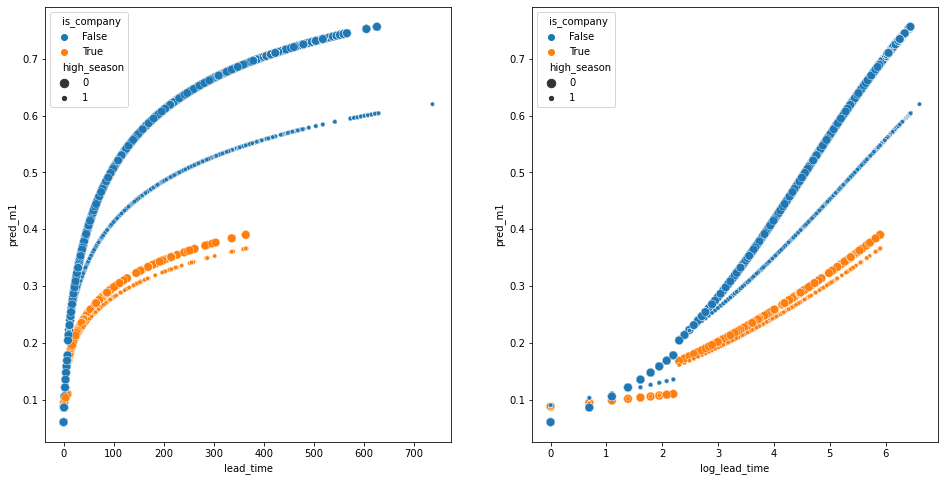

In [13]:
import statsmodels.formula.api as fsm
import seaborn as sns
import matplotlib.pyplot as plt

model = fsm.logit(
    formula="is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
fit = model.fit()
fit.summary()
train_tb_hotel_f["pred_m1"] = fit.predict()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(
    data=train_tb_hotel_f,
    x="lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[0],
)
sns.scatterplot(
    data=train_tb_hotel_f,
    x="log_lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[1],
)


In [9]:
%matplotlib inline

In [14]:
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score


In [15]:
y_train, X_train = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
y_test, X_test = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=test_tb_hotel_f,
)
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")

Precision: 0.5524953510579484
Recall: 0.3492946110828673
F1-Score: 0.4280013237555724


A precisão está bem mais alta que o recall, talvez possamos sacrifica-la um pouco alterando o threshold para obter um F1 melhor

Text(0.5, 1.0, 'Best Threshold: 0.27 w/ F-1: 0.6')

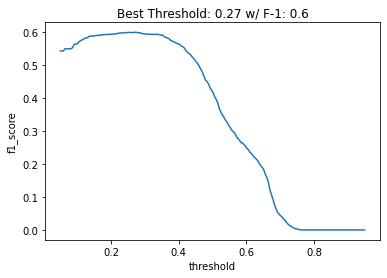

In [16]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
sns.lineplot(data=df_f1, x="threshold", y="f1_score").set_title(title)

## 1NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [14]:
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.42466461255813065
Recall: 0.7050711743772242
F1-Score: 0.5300686772170798


## Floresta Aleatória

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
stump_fit = RandomForestClassifier(
    n_estimators=1000, max_depth=1, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)

/var/folders/c2/4vv1dtt97gl9bn1lvw8rf0k40000gn/T/ipykernel_1503/1031630482.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  stump_fit.fit(scaler.transform(X_train), y_train)


RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=1000)

In [21]:
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.45069013167299354
Recall: 0.8988247964775571
F1-Score: 0.6003512186865267


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight="balanced")
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


## EDA II

Este modelo inicial apresentou uma performance razoável a partir de um feature set bem pequeno. No entanto não consideramos muitas das variáveis categóricas que o dataset nos fornece.

In [22]:
from sklearn.feature_selection import chi2

In [23]:
train_tb_hotel_f.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84955 entries, 0 to 84954
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84955 non-null  object        
 1   is_cancelled                    84955 non-null  int64         
 2   lead_time                       84955 non-null  int64         
 3   stays_in_weekend_nights         84955 non-null  int64         
 4   stays_in_week_nights            84955 non-null  int64         
 5   adults                          84955 non-null  int64         
 6   children                        84952 non-null  float64       
 7   babies                          84955 non-null  int64         
 8   meal                            84955 non-null  object        
 9   country                         84955 non-null  object        
 10  market_segment                  84955 non-null  object        
 11  di

In [24]:
cat_train_tb_hotel_f = train_tb_hotel_f.select_dtypes("object")
cat_train_tb_hotel_f = cat_train_tb_hotel_f.drop(
    ["reservation_status_date", "country"], axis=1
)


In [39]:
cat_train_tb_hotel_f.columns


Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_type', 'grouped_country'],
      dtype='object')

In [25]:
dummies_train_tb_hotel_f = pd.get_dummies(cat_train_tb_hotel_f)


In [26]:
dummies_train_tb_hotel_f

,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,...,customer_type_Transient,customer_type_Transient-Party,reservation_type_last_minute,reservation_type_scheduled,grouped_country_DEU,grouped_country_ESP,grouped_country_FRA,grouped_country_GBR,grouped_country_PRT,grouped_country_other
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84950,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
84951,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
84952,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
84953,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [27]:
chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, train_tb_hotel_f["is_cancelled"])

<AxesSubplot:xlabel='p_rank', ylabel='p_value'>

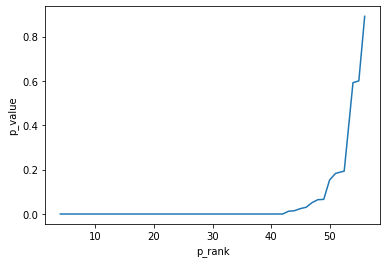

In [28]:
cat_imp = pd.DataFrame(
    {"cat_value": dummies_train_tb_hotel_f.columns, "p_value": p_hotel}
)
cat_imp["p_rank"] = cat_imp["p_value"].rank()
sns.lineplot(data=cat_imp, x="p_rank", y="p_value")

In [36]:
from sklearn.decomposition import NMF

In [37]:
imp_dum = dummies_train_tb_hotel_f[
    cat_imp.loc[cat_imp["p_value"] < 0.01, "cat_value"].to_list()
]

In [38]:
imp_dum.columns

Index(['hotel_City Hotel', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reserved_room_type_A',
       'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
       'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C',
       'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F',
       'assigned_room_type_G', 'assigned_room_type_I', 'assigned_room_type_K',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reservation_type_last_minute', 'reservation_t

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
for i in range(1, 20):
    nmf_fit = NMF(
        beta_loss="kullback-leibler", solver="mu", n_components=i, init="nndsvd"
    )
    
    nmf_decomp = nmf_fit.fit_transform(imp_dum)
    X_train, X_test, y_train, y_test = train_test_split(
        nmf_decomp, train_tb_hotel_f["is_cancelled"], test_size=0.2
    )

    log_nmf_fit = LogisticRegression()
    log_nmf_fit.fit(X_train, y_train)
    print(f"{i} NMF: {f1_score(y_test, log_nmf_fit.predict(X_test))}")

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


1 NMF: 0.0


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


2 NMF: 0.0


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


3 NMF: 0.0


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


4 NMF: 0.49933739729658094


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


5 NMF: 0.5656117718201975


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


6 NMF: 0.5839640008181632


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


7 NMF: 0.5780240073868882


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


8 NMF: 0.5787695772341079


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


9 NMF: 0.5920322743318205


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


10 NMF: 0.5919919919919919


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


11 NMF: 0.5878806150135665


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


12 NMF: 0.5826467297324789


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


13 NMF: 0.551024906325766


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


14 NMF: 0.5473872664204991


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


15 NMF: 0.5489147866994547


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


16 NMF: 0.5380440801860671


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


17 NMF: 0.538698328935796


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


18 NMF: 0.5622768325981937


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


19 NMF: 0.5563143631436314


Essa rotina produziu uma regressão com F1 de 0.6! Vamos funcionaliza-la e incorporar ao nosso modelo

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
CAT_VAR_SET = [
    "hotel",
    "meal",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    "reservation_type",
    "grouped_country",
]


def create_relevant_set(hotel_data):
    global CAT_VAR_SET
    cat_train_tb_hotel_f = hotel_data[CAT_VAR_SET]
    ohe_fit = OneHotEncoder()
    dummies_train_tb_hotel_f = ohe_fit.fit_transform(cat_train_tb_hotel_f)
    chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, hotel_data["is_cancelled"])
    cat_imp = pd.DataFrame(
        {"cat_value": ohe_fit.get_feature_names_out(), "p_value": p_hotel}
    )
    imp_dum = cat_imp.loc[cat_imp["p_value"] < 0.2, "cat_value"].to_list()
    return ohe_fit, imp_dum

def estimate_nmf(hotel_data):
    global CAT_VAR_SET
    ohe_fit, imp_var = create_relevant_set(hotel_data)
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    f1_score_list = []
    for i in range(1, 20):
        nmf_fit = NMF(
            beta_loss="kullback-leibler", solver="mu", n_components=i, init="nndsvd"
        )
        nmf_decomp = nmf_fit.fit_transform(tb_imp_cat)
        X_train, X_test, y_train, y_test = train_test_split(
            nmf_decomp, train_tb_hotel_f["is_cancelled"], test_size=0.2
        )
        log_nmf_fit = LogisticRegression()
        log_nmf_fit.fit(X_train, y_train)
        n_score = f1_score(y_test, log_nmf_fit.predict(X_test))
        print(f"N Comp.: {i} F1: {n_score}")
        f1_score_list.append(n_score)
    best_n = np.argmax(np.array(f1_score_list))
    print(f"Best N: {best_n}")
    nmf_fit = NMF(
        beta_loss="kullback-leibler", solver="mu", n_components=best_n, init="nndsvd"
    )
    nmf_fit.fit(tb_imp_cat)
    return ohe_fit, imp_var, nmf_fit


def project_nmf(ohe_fit, imp_var, nmf_fit, hotel_data):
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    tb_nmf_fit = pd.DataFrame(
        nmf_fit.transform(tb_imp_cat),
        columns=["C" + str(i) for i in range(nmf_fit.n_components_)],
    )
    final_data = pd.concat([hotel_data, tb_nmf_fit], axis=1)
    return final_data


In [44]:
ohe_fit, imp_var, nmf_fit = estimate_nmf(train_tb_hotel_f)

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 1 F1: 0.0


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 2 F1: 0.0


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 3 F1: 0.4718427778267383


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 4 F1: 0.5179454888908879


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 5 F1: 0.5292319826481316


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 6 F1: 0.5408410837040032


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 7 F1: 0.5503891847603442


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 8 F1: 0.5474278272194487


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 9 F1: 0.5339347079037801


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 10 F1: 0.5202952029520295


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 11 F1: 0.521030322791001


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 12 F1: 0.526837680534598


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 13 F1: 0.5224463240078074


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 14 F1: 0.5168933742869679


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 15 F1: 0.5581717451523546


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 16 F1: 0.5664267652207742


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 17 F1: 0.5567340404242545


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 18 F1: 0.5550163414875706


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


N Comp.: 19 F1: 0.5729166666666666
Best N: 18


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


In [45]:
train_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, train_tb_hotel_f)
test_tb_hotel_fd = project_nmf(ohe_fit, imp_var, nmf_fit, test_tb_hotel_f)

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1411: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


# Regressão logística II

In [168]:
model_desc = "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season + C0 + C1 + C2 + C3 + C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + C15 + C16 + C17"
y_train, X_train = patsy.dmatrices(
    model_desc,
    data=train_tb_hotel_fd,
)
y_test, X_test = patsy.dmatrices(
    model_desc,
    data=test_tb_hotel_fd,
)
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)


LogisticRegression()

In [169]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.7691465604063581
Recall: 0.5581151499745806
F1-Score: 0.6468541125780258


Text(0.5, 1.0, 'Best Threshold: 0.32 w/ F-1: 0.69')

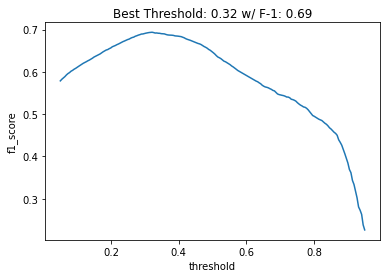

In [170]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)


# 1NN v2

In [149]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.7946799422629393
Recall: 0.8571746314184037
F1-Score: 0.8247451046332105


# Floresta Aleatória

In [175]:
stump_fit = RandomForestClassifier(
    n_estimators=100, max_depth=20, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20)

In [176]:
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.7653444116858751
Recall: 0.9073144382308084
F1-Score: 0.8303044401151465
